<center><h1>Python Loops - Break or Conditionals?</h1></center>
<center><h3>Written 22/11/2020, by Tyler J. Russell</h3></center>

***

#### Abstract

I was working on my [Fox and Hen Game] project for computer science when I found myself questioning whether `break` statements or conditionals are more efficient for `for` and `while` loops. Now, obviously, there is a difference: one will always run at least one iteration, the other depends on the condition. However, in this paper, I will only be comparing them with the same use case; id est, at least one iteration with a break check.

As such, in this test, superiority is measured in performance - both time to execute and operational expense.  
To ensure fairness of testing, I will be using the same number of tests to average for each (1 million) and also for the conditionals I will include the initial assignment in the setup rather than in the actual test block to avoid adding to the time for initial assignment. However, it is worth noting that initial assignment and cleanup afterwards would count into the operational expense and time difference in any real circumstance, so that should be taken into consideration. My aim in excluding it is simply to measure raw performance of both methods alone.

[Fox and Hen Game]: https://github.com/Nytelife26/transparency/tree/main/works/academic/2020/computer-science/assignments/fox-and-hen

#### Hypothesis

It is difficult to draw a logically concluded hypothesis for such a test, as one would assume reasonably that the two operations should be relatively similar. However, on the simple basis that conditionals require an assignment to memory, a loop back, and then another fetch to check the condition, whereas `break` requires only a single instruction to jump out of the loop, I believe `break` should be at least somewhat faster, if not significantly.

#### Testing

Setting up our test suite:

In [0]:
from timeit import timeit

def test(tests):
    for (key, value) in tests.items():
        time = timeit(value[0], value[2], number=value[1])
        print(f"{key}: {time}")

Running our tests:

In [1]:
tests = {}
tests["while_break"] = [
	"""
while True:
	break
	""",
	1000000,
	""
]
tests["while_check"] = [
	"""
while not over:
	over = True
	""",
	1000000,
	"over = False"
]
tests["forin_break"] = [
	"""
for x in p:
	break
	""",
	1000000,
	"p = [0, 1, 2]"
]
# It is not actually possible to directly build a
# conditional into a for loop in Python, as a
# consequence of how Python is built. As such, we
# will test 2 methods: erasing the rest of the list,
# and an `if...break`.
tests["forin_check_del"] = [
	"""
for x in p:
	if over:
		p.clear()
	over = True
	""",
	1000000,
	"over = False;p = [0, 1, 2]"
]
tests["forin_check_brk"] = [
	"""
for x in p:
	if over:
		break
	over = True
	""",
	1000000,
	"over = False;p = [0, 1, 2]"
]

test(tests)

while_break: 0.009433598999748938
while_check: 0.019497580000461312
forin_break: 0.056230802001664415
forin_check_del: 0.03414379199966788
forin_check_brk: 0.045858978999604005


Of course, I always run my test suites more than once. However, upon doing so, I noticed an inconsistency in the primary results. They seemed to change back and forth quite often, so I'll now be constructing a table to measure results and see if the discrepancies warrant a change in approach or an inconclusive mark.

As the reader you are welcome at any time to run the suite on your own machine to verify my claims.

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors as col

def plot(checks):
	"""Plots test results from checks. `checks` must be dict, where the key is the name and the value is an instance of `np.array`"""
	# calculates plot values
	low = min([checks[x].min() for x in checks])
	lim = max([checks[x].max() for x in checks])
	tests = range(1, len(checks[list(checks.keys())[0]])+1)
	
	# plots graph
	plt.xlabel("test no.")
	plt.ylabel("time (s)")
	for name, x in checks.items():
		colour = list(col.BASE_COLORS.keys())[list(checks.keys()).index(name)]
		plt.plot(tests, x, linestyle="-", c=colour, label=name)
	plt.xticks(tests)
	plt.ylim([low-(0.1*low), lim+(0.1*low)])
	plt.legend(loc="upper left")
	plt.show()

| Test |     `while_break`    |     `while_check`    |
|:----:|:--------------------:|:--------------------:|
|   1  | 0.016855678999945667 | 0.014753502000075969 |
|   2  | 0.017085809000036534 | 0.012262844999895606 |
|   3  |   0.01806852899972   | 0.021265754000069137 |
|   4  | 0.015186278999863134 |  0.01617280499976914 |
|   5  |  0.01349683799980994 | 0.020387914999446366 |
|   6  | 0.022207265000361076 |  0.01812310300010722 |
|   7  |  0.01449698000033095 | 0.016063858000052278 |
|   8  | 0.019192011000086495 | 0.013797925999824656 |
|   9  |  0.02037990900043951 | 0.014765822000299522 |
|  10  | 0.018137518000003183 | 0.013981764999698498 |

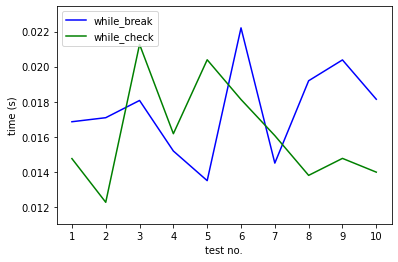

In [3]:
%matplotlib inline
res_brk = np.array([0.016855678999945667, 0.017085809000036534, 0.01806852899972, 0.015186278999863134, 0.01349683799980994, 0.022207265000361076, 0.01449698000033095, 0.019192011000086495, 0.02037990900043951, 0.018137518000003183])
res_chk = np.array([0.014753502000075969, 0.012262844999895606, 0.021265754000069137, 0.01617280499976914, 0.020387914999446366, 0.01812310300010722, 0.016063858000052278, 0.013797925999824656, 0.014765822000299522, 0.013981764999698498])
plot({"while_break": res_brk, "while_check": res_chk})

The results prove to be inconsistent a lot of the time. First, I will try increasing the base number of tests to average out, in order to see if the problem is actually that I am measuring too small a number of tests for the perhaps miniscule difference in execution time between the two constructs. This time, I will run for 1 billion tests, in order to magnify the results enough to see any genuinely major differences.

In [4]:
tests = {}

tests["while_break"] = [
	"""
while True:
	break
	""",
	1000000000,
	""
]
tests["while_check"] = [
	"""
while not over:
	over = True
	""",
	1000000000,
	"over = False"
]

test(tests)

while_break: 7.418902970999625
while_check: 9.252725321999606


| Test |    `while_break`   |   `while_check`   |
|:----:|:------------------:|:-----------------:|
|   1  |  7.545864007000091 | 8.893152812000153 |
|   2  | 6.9994925880000665 | 8.789875424999991 |
|   3  |  6.99228112200035  | 8.772128739999971 |
|   4  |  7.016520256000149 | 8.774441176999972 |
|   5  |  7.008395603999816 | 9.082717027000399 |
|   6  |  7.012604857000042 |  8.75714720399992 |
|   7  | 7.0721877389996735 | 8.862611889000618 |
|   8  | 7.0326520609996805 | 8.788487822999741 |
|   9  |  7.169503927000733 |  9.04424666399973 |
|  10  |  7.203111390999766 | 9.042622316000234 |

Now, to compare our new results:

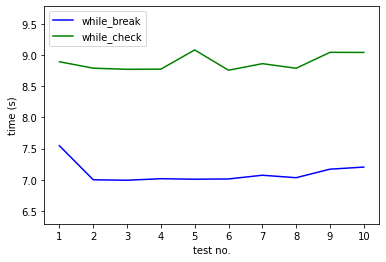

In [5]:
%matplotlib inline
res_brk = np.array([7.545864007000091, 6.9994925880000665, 6.99228112200035, 7.016520256000149, 7.008395603999816, 7.012604857000042, 7.0721877389996735, 7.0326520609996805, 7.169503927000733, 7.203111390999766])
res_chk = np.array([8.893152812000153, 8.789875424999991, 8.772128739999971, 8.774441176999972, 9.082717027000399, 8.75714720399992, 8.862611889000618, 8.788487822999741, 9.04424666399973, 9.042622316000234])
plot({"while_break": res_brk, "while_check": res_chk})

As the graph shows, these results are significantly more consistent. Furthermore, they produce a conclusive result.  
Now that the inconclusivity is resolved, we can draw the conclusions for our hypothesis.

#### Conclusion

Our hypothesis holds true for `while` loops: the `break` statement proves to be faster than conditionals in our test cases.
However, another interesting result can be seen from our testing; id est, in terms of `for` loops, conditionals are actually faster.  
Not just conditionals, though - interestingly enough, using `:list:.clear()` to erase the rest of the elements on a conditional is faster than running `break` conditionally.

In summary:
- `break` is faster than conditionals for `while` loops.
- Conditionals are faster than `break` for `for` loops.
  * Conditionally reserved `break` is faster than pure `break`.
  * Conditionally reserved `:list:.clear()` is faster than conditionally reserved `break`.
  
Therefore, I conclude that `break` should be preferred to end `while` loops, and conditionals should be preferred to end `for` loops, with `:list:.clear()` being preferred in instances where the list does not need to remain intact and conditionally reserved `break` being preferred otherwise.

May this document serve useful to you, its reader, as this research did to me.